# Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
plt.rcParams['figure.figsize'] = (13,4)
plt.rcParams['figure.dpi'] = 80

## Load the dataset

In [3]:
data = pd.read_csv("data/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic = sns.load_dataset('titanic')

In [7]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
cols = titanic.columns

In [9]:
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [10]:
len(cols)

15

In [11]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Heatmap

In [13]:
plt.style.use('ggplot')

In [15]:
titanic.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

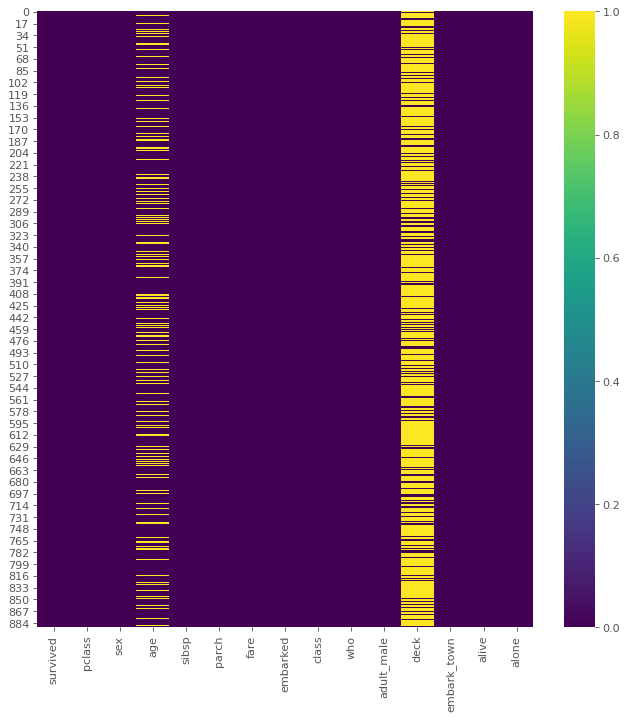

In [26]:
sns.heatmap(titanic.isnull(), cmap='viridis', cbar=True)

In [24]:
cor_mat = titanic.corr()
cor_mat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

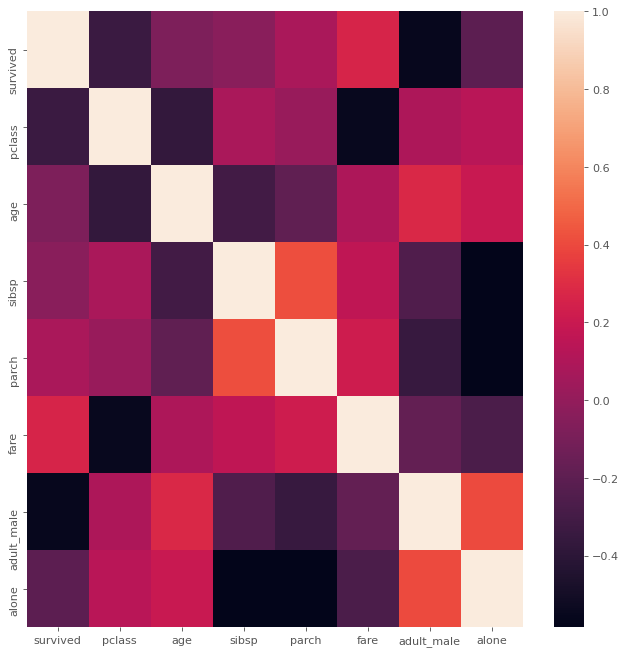

In [27]:
sns.heatmap(cor_mat)

## Univariate Analysis

In [29]:
print(list(cols))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


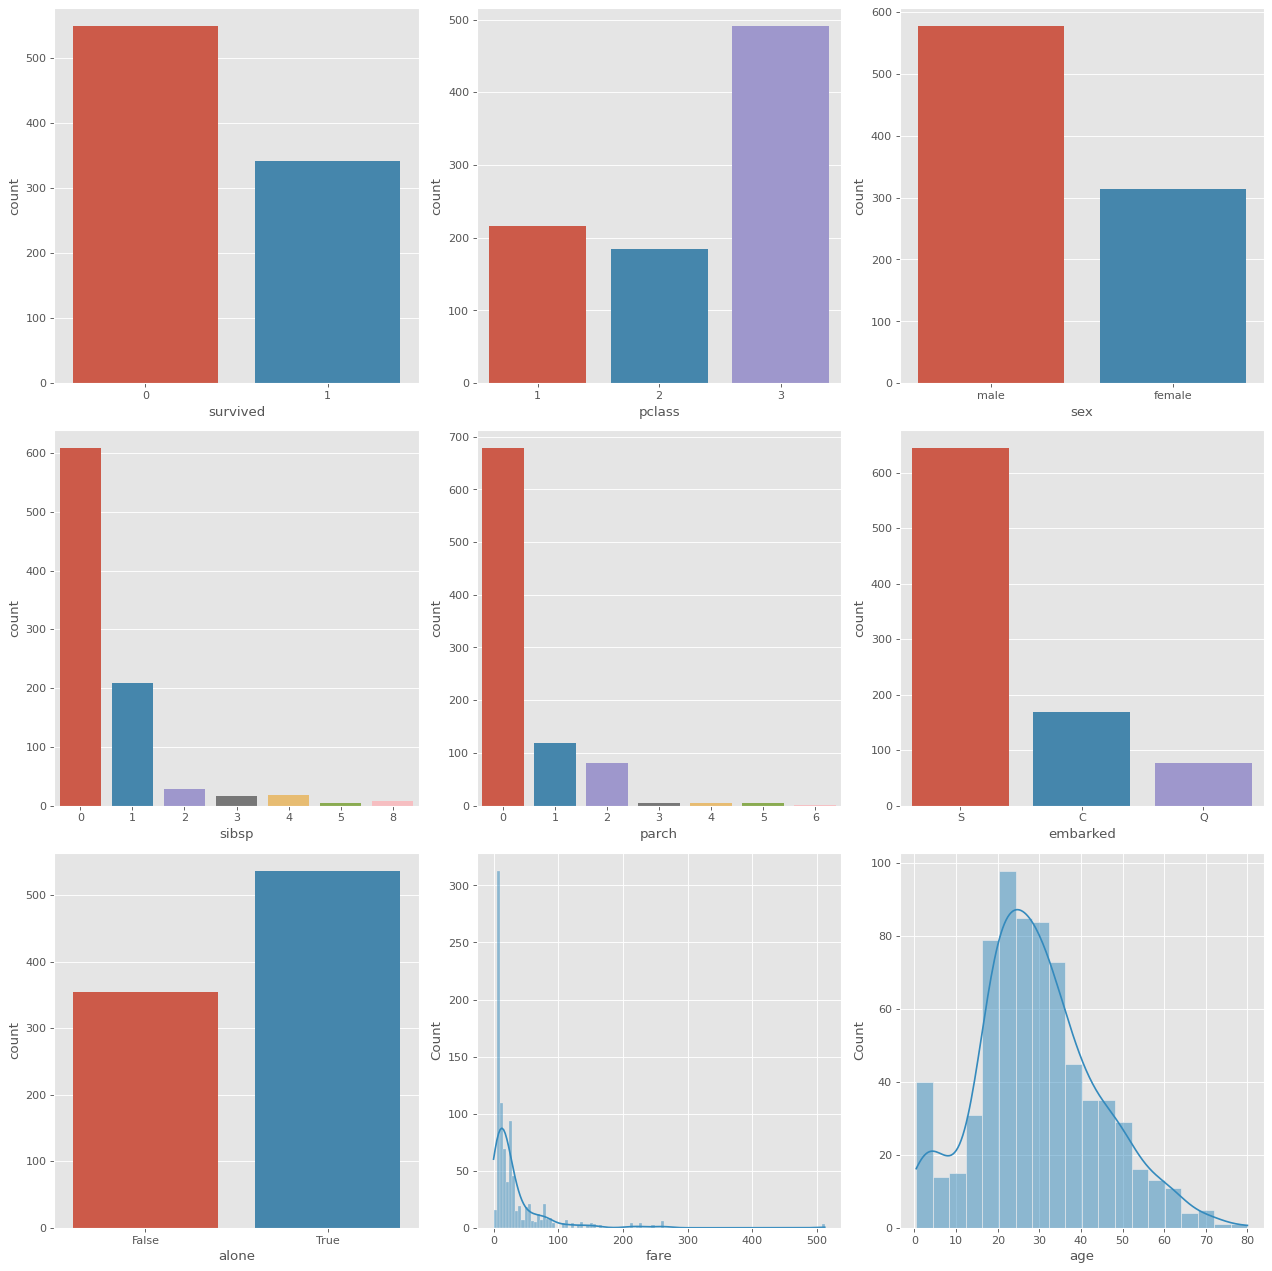

In [44]:
fig, ax = plt.subplots(3,3, figsize=(16,16))

sns.countplot(x = 'survived', data = titanic, ax = ax[0][0])
sns.countplot(x = 'pclass', data = titanic, ax = ax[0][1])
sns.countplot(x = 'sex', data=titanic, ax = ax[0][2])

sns.countplot(x = 'sibsp', data = titanic, ax = ax[1][0])
sns.countplot(x = 'parch', data = titanic, ax = ax[1][1])
sns.countplot(x = 'embarked', data=titanic, ax = ax[1][2])

sns.countplot(x = 'alone', data = titanic, ax = ax[2][0])
## age and fare are continuous parameters
sns.histplot(x = titanic['fare'], kde = True, ax = ax[2][1])
sns.histplot(x = titanic['age'], kde = True, ax = ax[2][2])

plt.tight_layout()

# Class by Class Analysis based on column

### Survived

In [46]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

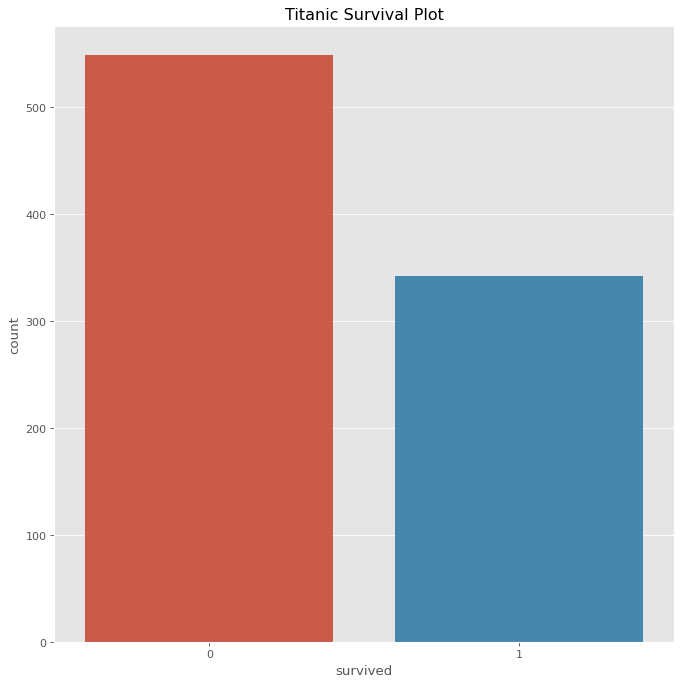

In [48]:
sns.countplot(x='survived', data = titanic)
plt.title("Titanic Survival Plot");

<AxesSubplot:xlabel='survived', ylabel='Count'>

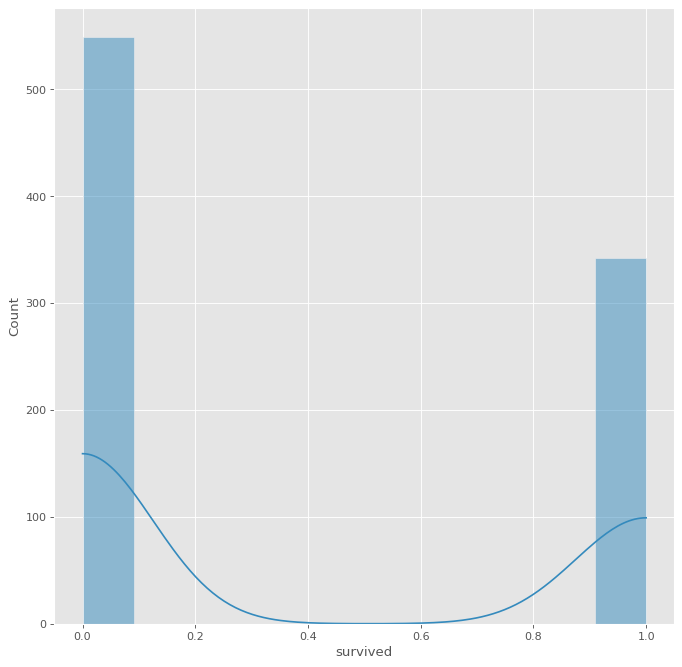

In [49]:
sns.histplot(x = titanic['survived'], kde = True)

<AxesSubplot:ylabel='Frequency'>

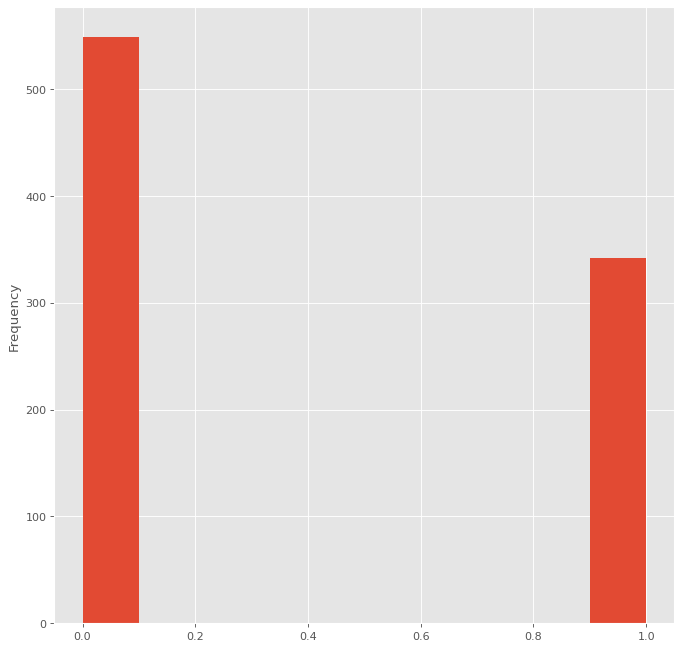

In [50]:
titanic['survived'].plot.hist()

<AxesSubplot:ylabel='survived'>

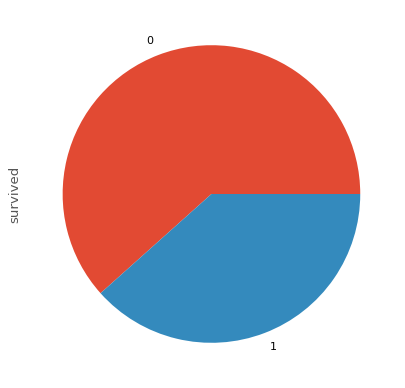

In [55]:
titanic['survived'].value_counts().plot.pie()

<AxesSubplot:ylabel='survived'>

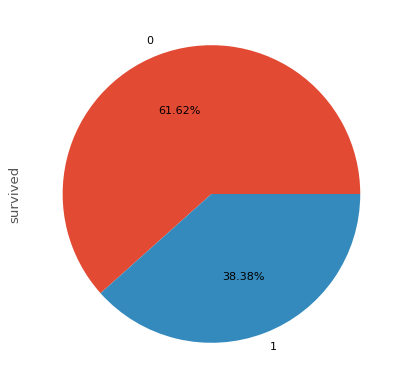

In [58]:
titanic['survived'].value_counts().plot.pie(autopct = '%1.2f%%')

<AxesSubplot:ylabel='survived'>

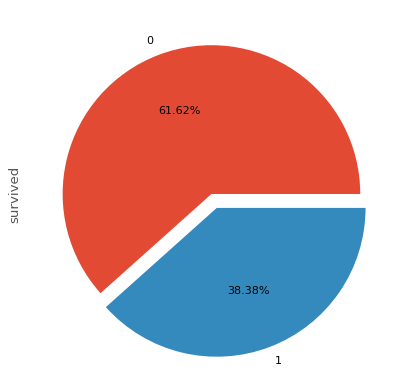

In [60]:
explode = [0,0.1]
titanic['survived'].value_counts().plot.pie(autopct = '%1.2f%%', explode = explode)

## Passanger Class (pclass)

In [62]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [63]:
## Group by pclass and survived and return the count
titanic.groupby(['pclass','survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

<AxesSubplot:xlabel='pclass', ylabel='count'>

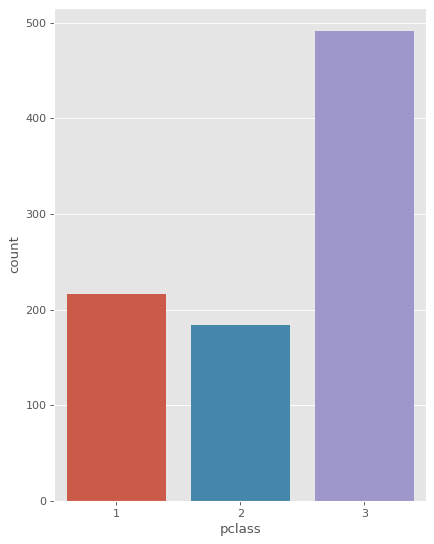

In [67]:
sns.countplot(x='pclass', data=titanic)

<AxesSubplot:xlabel='pclass', ylabel='count'>

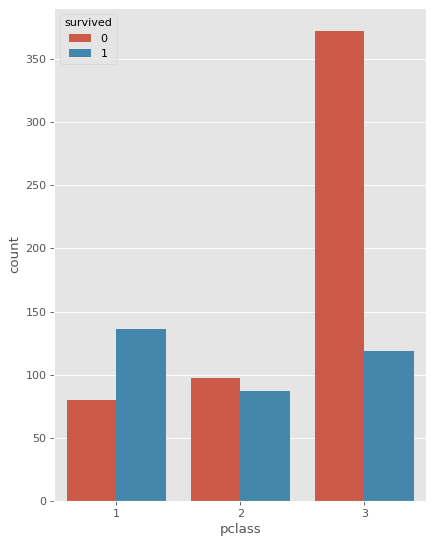

In [68]:
sns.countplot(x='pclass', data=titanic, hue='survived')

<AxesSubplot:ylabel='pclass'>

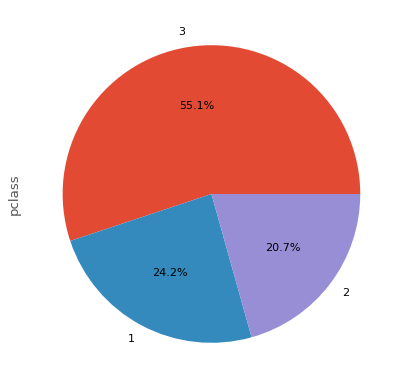

In [71]:
titanic['pclass'].value_counts().plot.pie(autopct='%1.1f%%')

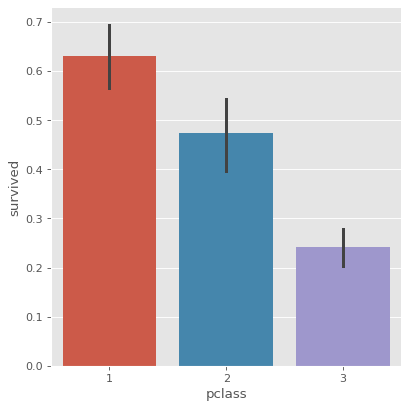

In [73]:
sns.catplot(x='pclass', y='survived', kind='bar', data=titanic)

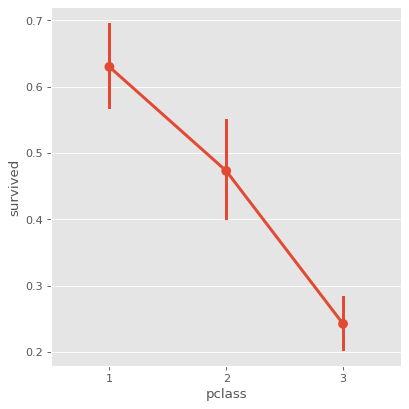

In [74]:
sns.catplot(x='pclass', y='survived', kind='point', data=titanic)

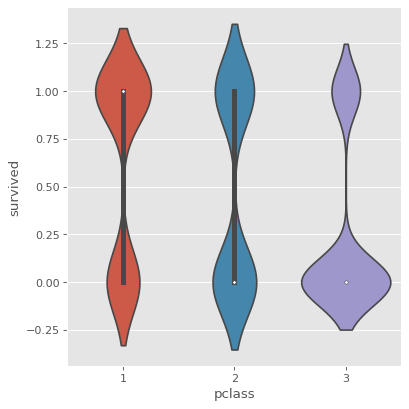

In [75]:
sns.catplot(x='pclass', y='survived', kind='violin', data=titanic)

# Sex

In [76]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [77]:
titanic.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

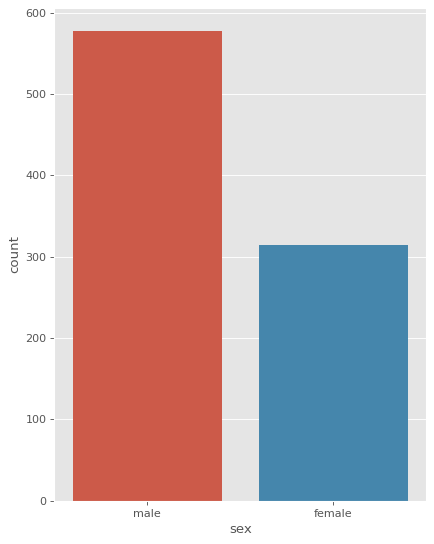

In [78]:
sns.countplot(x='sex', data=titanic)

<AxesSubplot:xlabel='sex', ylabel='count'>

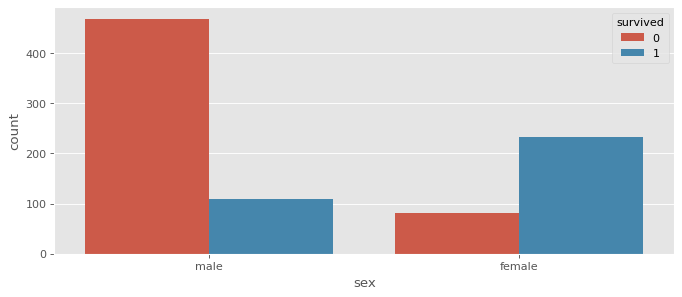

In [85]:
sns.countplot(x='sex', data=titanic, hue='survived')

<AxesSubplot:ylabel='sex'>

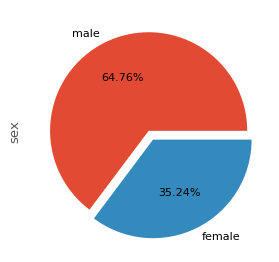

In [89]:
titanic['sex'].value_counts().plot.pie(autopct="%1.2f%%", explode=(0,0.1))

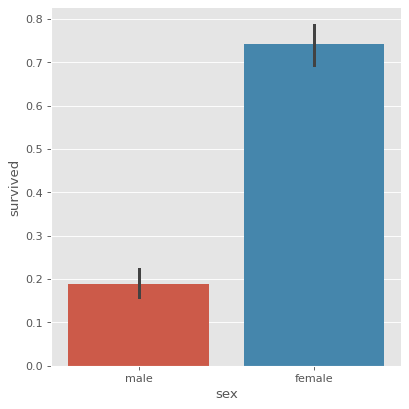

In [92]:
sns.catplot(x='sex', y='survived', kind='bar', data=titanic)

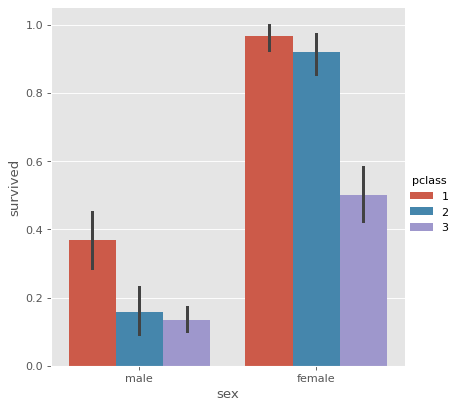

In [96]:
sns.catplot(x='sex', y='survived', kind='bar', data=titanic, hue='pclass');

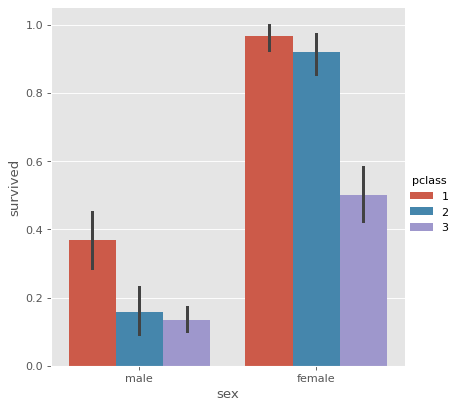

In [96]:
sns.catplot(x='sex', y='survived', kind='bar', data=titanic, hue='pclass');

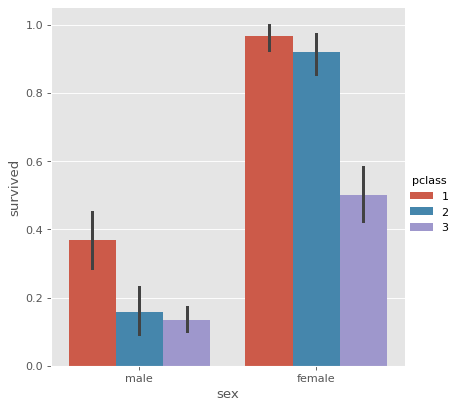

In [96]:
sns.catplot(x='sex', y='survived', kind='bar', data=titanic, hue='pclass');

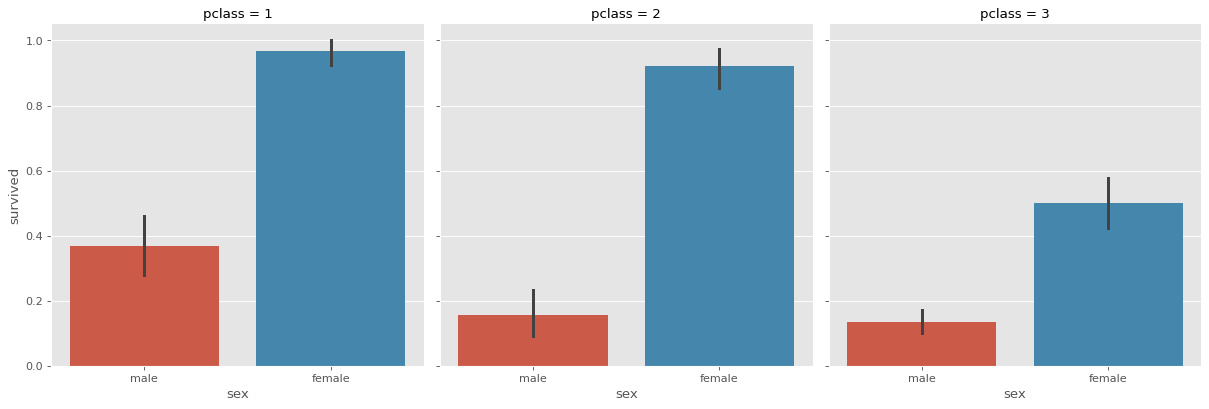

In [97]:
sns.catplot(x='sex', y='survived', kind='bar', data=titanic, col='pclass');

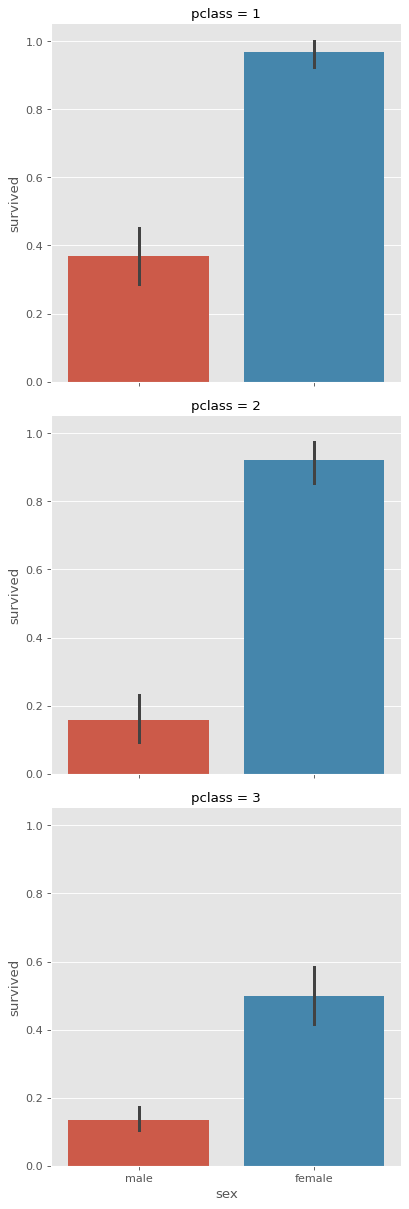

In [98]:
sns.catplot(x='sex', y='survived', kind='bar', data=titanic, row='pclass');

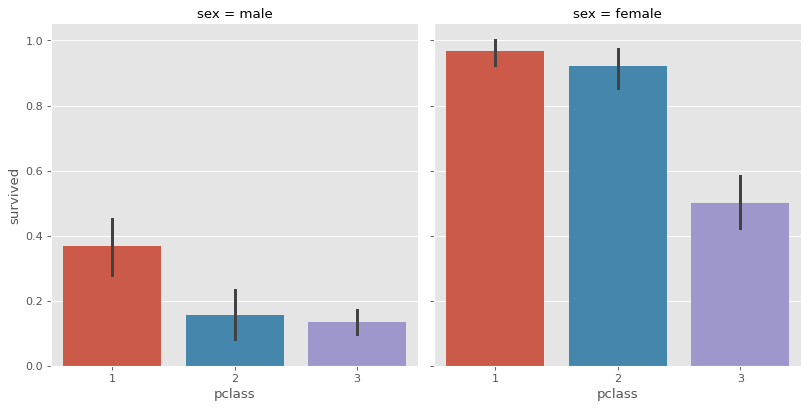

In [100]:
sns.catplot(x='pclass', y='survived', kind='bar', data=titanic, col='sex');

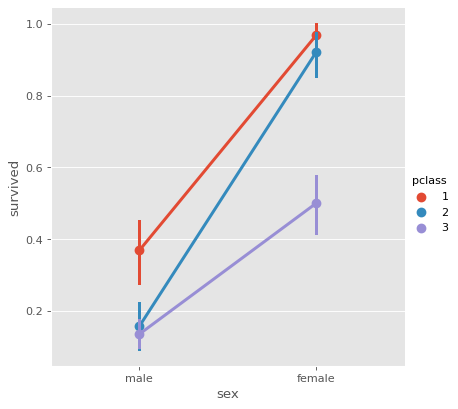

In [102]:
sns.catplot(x='sex', y='survived', kind='point', data=titanic, hue='pclass')

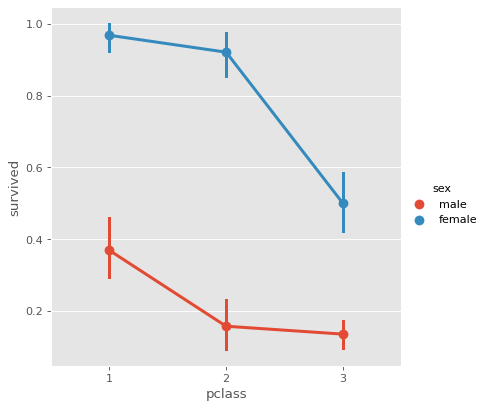

In [103]:
sns.catplot(x='pclass', y='survived', kind='point', data=titanic, hue='sex')

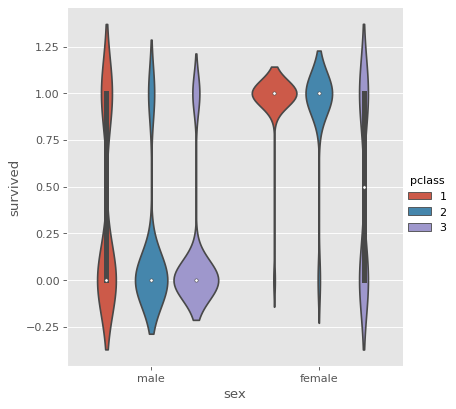

In [105]:
sns.catplot(x='sex', y='survived', kind='violin', data=titanic, hue='pclass')

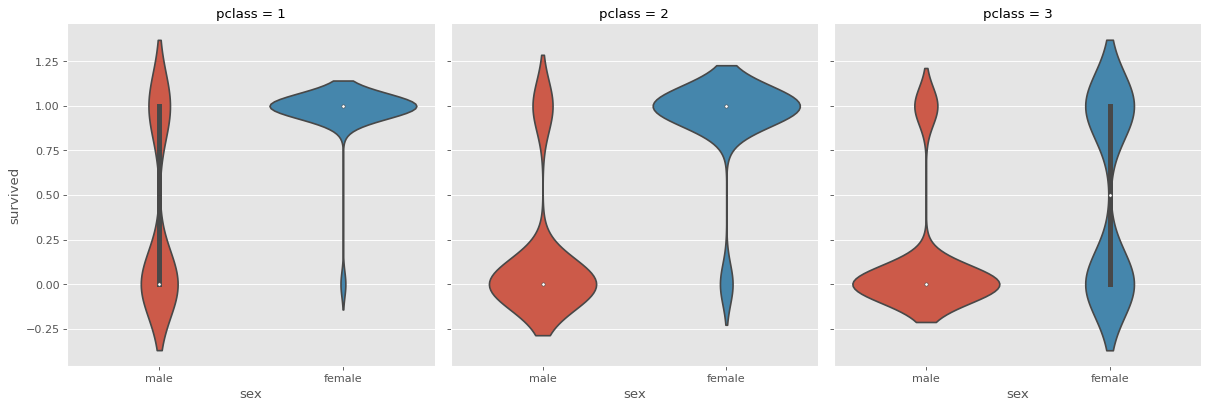

In [106]:
sns.catplot(x='sex', y='survived', kind='violin', data=titanic, col='pclass')

## Age

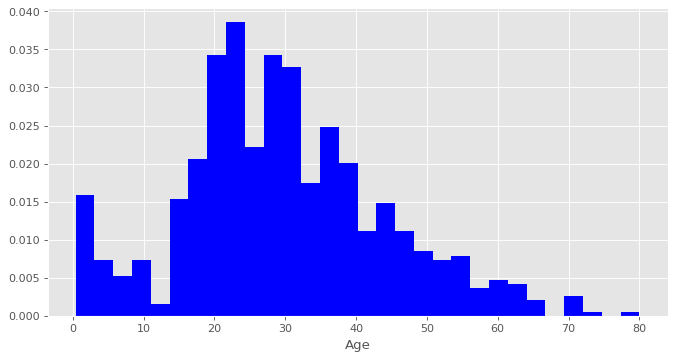

In [113]:
titanic['age'].hist(bins=30, density=True, color='blue', figsize=(10,5))
plt.xlabel('Age')
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

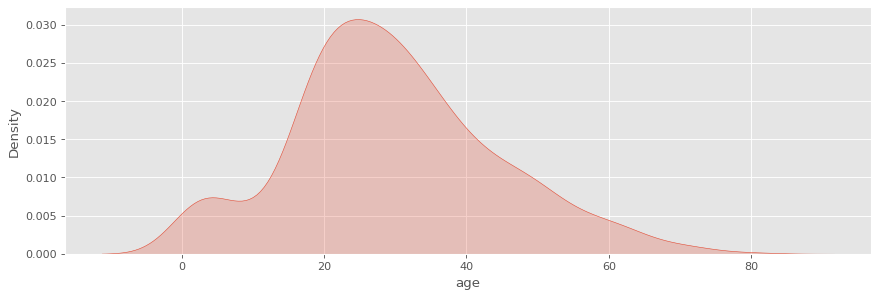

In [128]:
sns.kdeplot(titanic['age'], shade=True)

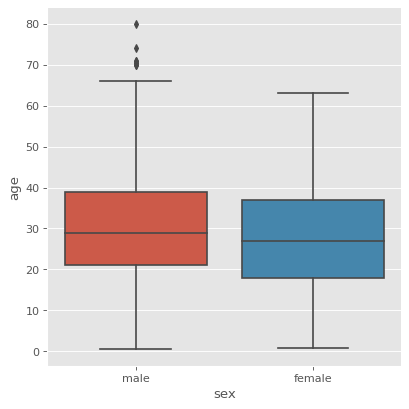

In [129]:
sns.catplot(x='sex', y='age', kind='box', data=titanic)

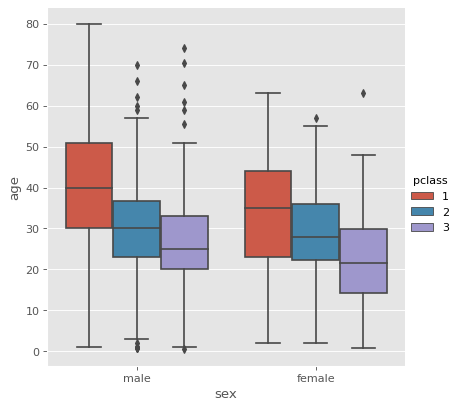

In [130]:
sns.catplot(x='sex', y='age', kind='box', data=titanic, hue='pclass')

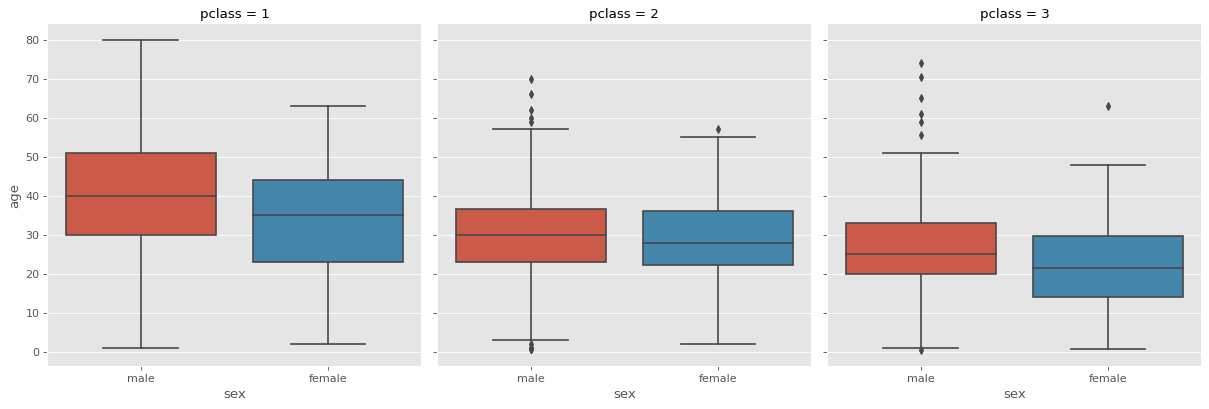

In [131]:
sns.catplot(x='sex', y='age', kind='box', data=titanic, col='pclass')

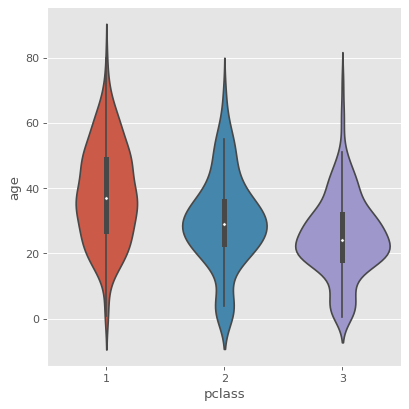

In [132]:
sns.catplot(x='pclass', y='age', data=titanic, kind='violin')

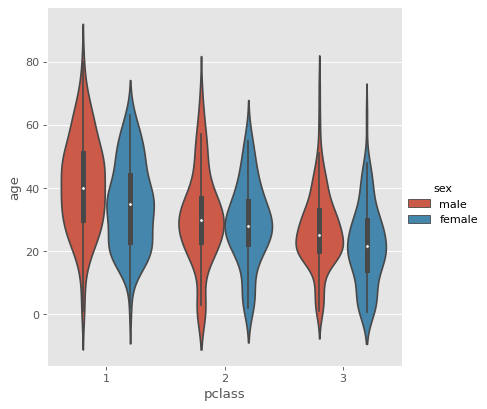

In [133]:
sns.catplot(x='pclass', y='age', data=titanic, kind='violin', hue='sex')

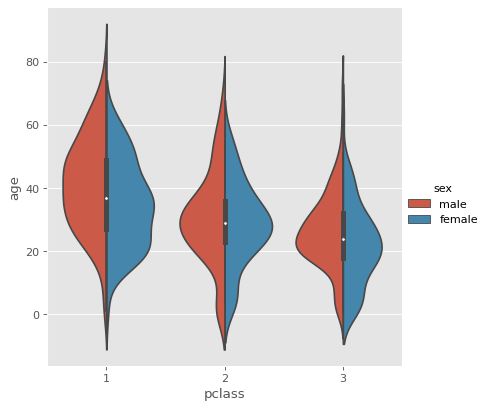

In [135]:
sns.catplot(x='pclass', y='age', data=titanic, kind='violin', hue='sex', split= True)

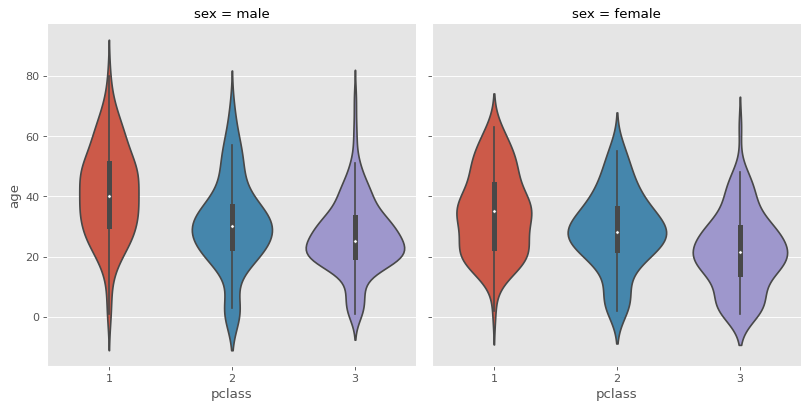

In [134]:
sns.catplot(x='pclass', y='age', data=titanic, kind='violin', col='sex')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


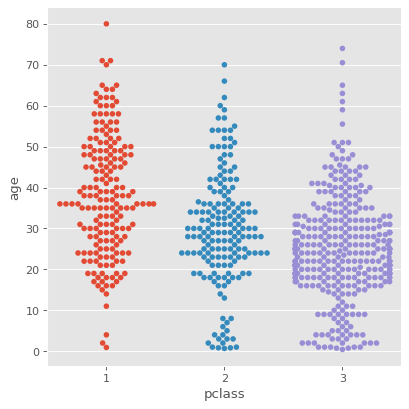

In [138]:
sns.catplot(x='pclass', y='age', data=titanic, kind='swarm')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


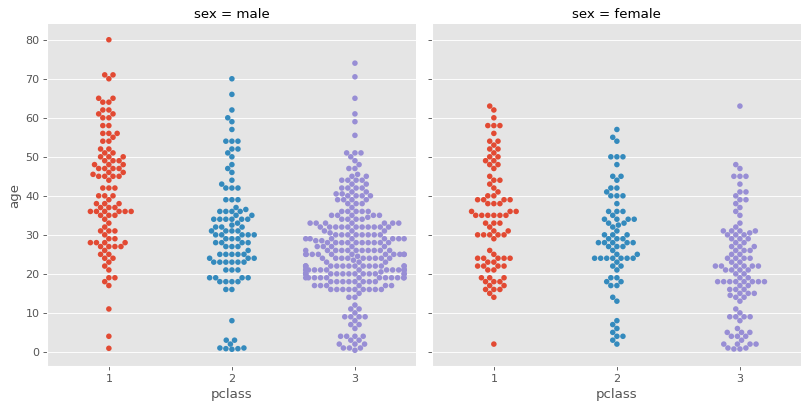

In [141]:
sns.catplot(x='pclass', y='age', data=titanic, kind='swarm', col='sex')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


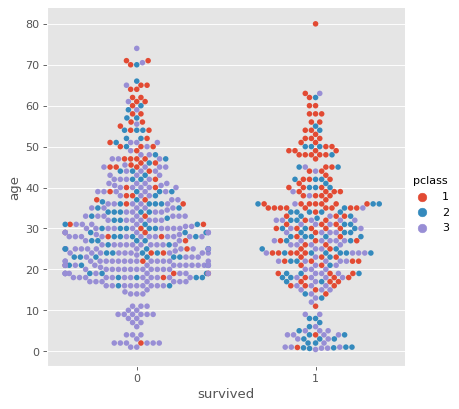

In [143]:
sns.catplot(x='survived', y='age', data=titanic, kind='swarm', hue='pclass')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


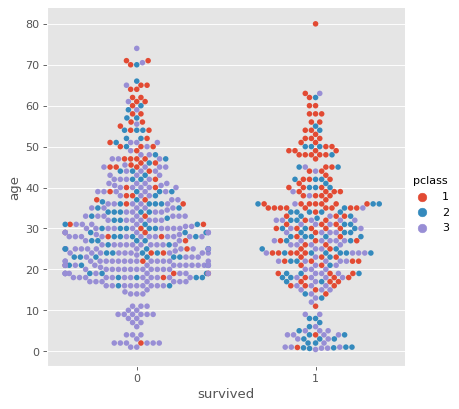

In [143]:
sns.catplot(x='survived', y='age', data=titanic, kind='swarm', hue='pclass')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


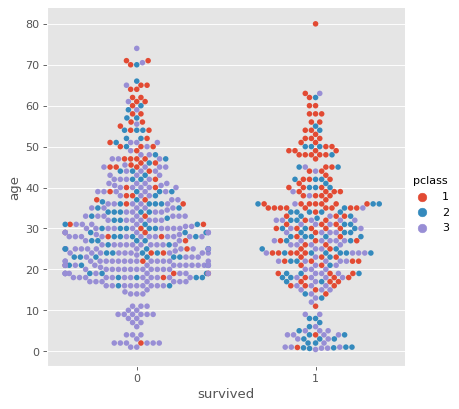

In [143]:
sns.catplot(x='survived', y='age', data=titanic, kind='swarm', hue='pclass')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


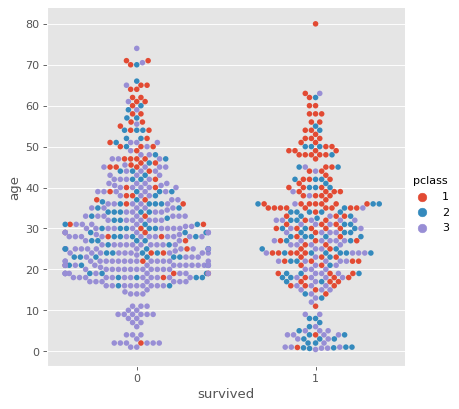

In [143]:
sns.catplot(x='survived', y='age', data=titanic, kind='swarm', hue='pclass')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


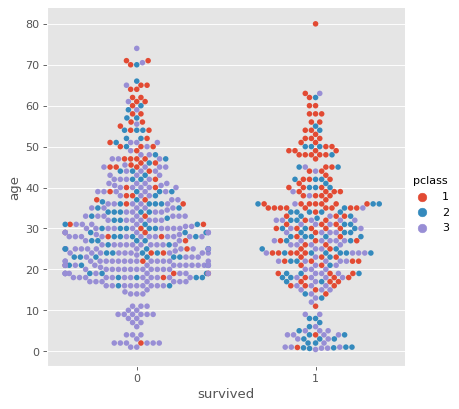

In [143]:
sns.catplot(x='survived', y='age', data=titanic, kind='swarm', hue='pclass')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


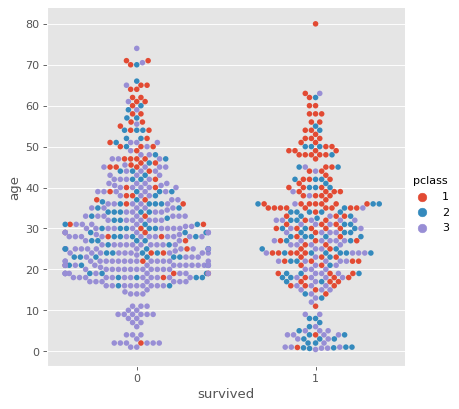

In [143]:
sns.catplot(x='survived', y='age', data=titanic, kind='swarm', hue='pclass')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


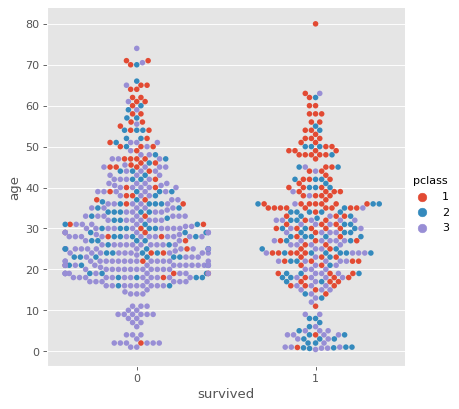

In [143]:
sns.catplot(x='survived', y='age', data=titanic, kind='swarm', hue='pclass')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


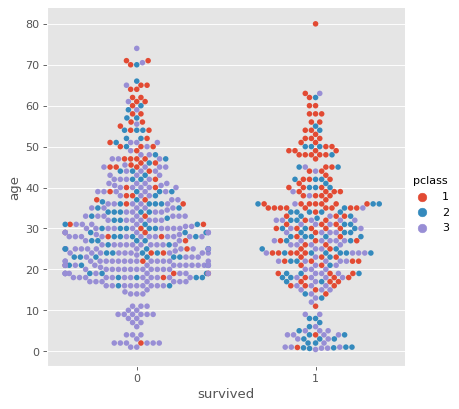

In [144]:
sns.catplot(x='survived', y='age', data=titanic, kind='swarm', hue='pclass')

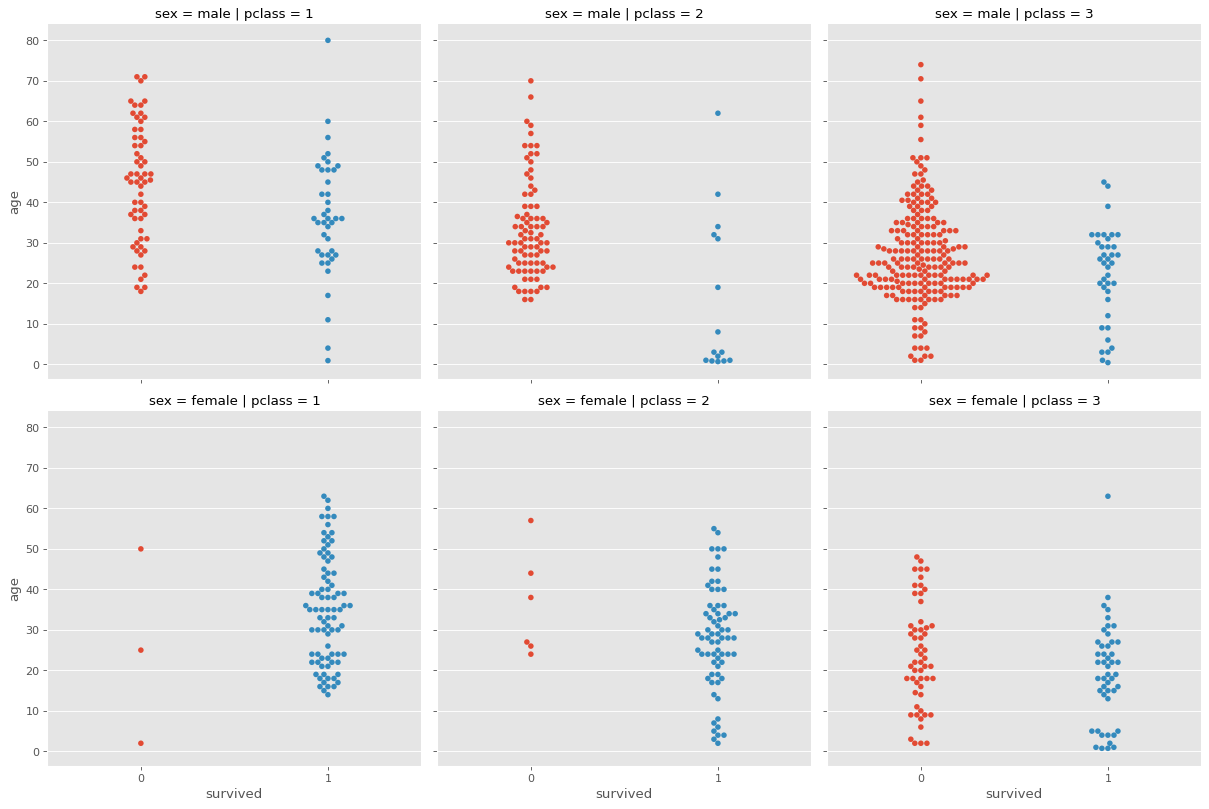

In [146]:
sns.catplot(x='survived', y='age', data=titanic, kind='swarm', row='sex', col='pclass')